In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [76]:
df=pd.read_csv("pokemon.csv")


In [77]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [78]:
df.shape

(801, 41)

DATA CLEANING


In [79]:
df.isna().sum()

   

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [80]:
df.drop(["type2"],axis=1,inplace=True)
df.drop(["percentage_male"],axis=1,inplace=True)

In [81]:
df["height_m"].fillna(value=df["height_m"].mean(),inplace=True)
df["weight_kg"].fillna(value=df["weight_kg"].mean(),inplace=True)



In [82]:
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,japanese_name,name,pokedex_number,sp_attack,sp_defense,speed,type1,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Fushigidaneフシギダネ,Bulbasaur,1,65,65,45,grass,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Fushigisouフシギソウ,Ivysaur,2,80,80,60,grass,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Fushigibanaフシギバナ,Venusaur,3,122,120,80,grass,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Hitokageヒトカゲ,Charmander,4,60,50,65,fire,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Lizardoリザード,Charmeleon,5,80,65,80,fire,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,Tekkaguyaテッカグヤ,Celesteela,797,107,101,61,steel,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,Kamiturugiカミツルギ,Kartana,798,59,31,109,grass,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,Akuzikingアクジキング,Guzzlord,799,97,53,43,dark,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,Necrozmaネクロズマ,Necrozma,800,127,89,79,psychic,230.0,7,1


In [83]:
df.drop(["japanese_name"],axis=1,inplace=True)
df.drop(["name"],axis=1,inplace=True)

In [84]:
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,height_m,hp,pokedex_number,sp_attack,sp_defense,speed,type1,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0.7,45,1,65,65,45,grass,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,1.0,60,2,80,80,60,grass,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,2.0,80,3,122,120,80,grass,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,0.6,39,4,60,50,65,fire,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,1.1,58,5,80,65,80,fire,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,9.2,97,797,107,101,61,steel,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,0.3,59,798,59,31,109,grass,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,5.5,223,799,97,53,43,dark,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,2.4,97,800,127,89,79,psychic,230.0,7,1


In [85]:
df["abilities"].unique()

array(["['Overgrow', 'Chlorophyll']", "['Blaze', 'Solar Power']",
       "['Torrent', 'Rain Dish']", "['Shield Dust', 'Run Away']",
       "['Shed Skin']", "['Compoundeyes', 'Tinted Lens']",
       "['Swarm', 'Sniper']", "['Keen Eye', 'Tangled Feet', 'Big Pecks']",
       "['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hustle', 'Thick Fat']",
       "['Keen Eye', 'Sniper']", "['Intimidate', 'Shed Skin', 'Unnerve']",
       "['Static', 'Lightningrod']",
       "['Static', 'Lightningrod', 'Surge Surfer']",
       "['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slush Rush']",
       "['Poison Point', 'Rivalry', 'Hustle']",
       "['Poison Point', 'Rivalry', 'Sheer Force']",
       "['Cute Charm', 'Magic Guard', 'Friend Guard']",
       "['Cute Charm', 'Magic Guard', 'Unaware']",
       "['Flash Fire', 'Drought', 'Snow Cloak', 'Snow Warning']",
       "['Cute Charm', 'Competitive', 'Friend Guard']",
       "['Cute Charm', 'Competitive', 'Frisk']",
       "['Inner Focus', 'Infiltrator']", "['Chlor

In [86]:
df.drop(["abilities"],axis=1,inplace=True)

In [87]:
df["capture_rate"].unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '145', '130', '140', '15', '220',
       '160', '80', '55', '30 (Meteorite)255 (Core)'], dtype=object)

In [88]:
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,experience_growth,height_m,hp,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,8.010000e+02,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.054996e+06,1.163892,68.958801,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.602558e+05,1.066737,26.576015,231.373075,32.353826,27.942501,28.907662,107.979179,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,6.000000e+05,0.100000,1.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,1.000000e+06,0.600000,50.000000,201.000000,45.000000,50.000000,45.000000,9.300000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000e+06,1.000000,65.000000,401.000000,65.000000,66.000000,65.000000,28.500000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.059860e+06,1.500000,80.000000,601.000000,91.000000,90.000000,85.000000,61.500000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,1.640000e+06,14.500000,255.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [89]:
df.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'classfication',
       'defense', 'experience_growth', 'height_m', 'hp', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'weight_kg', 'generation',
       'is_legendary'],
      dtype='object')

In [90]:
df.shape

(801, 36)

In [91]:
df["type1"].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

In [92]:
from sklearn.preprocessing import OneHotEncoder

In [93]:
df["type1"]=df["type1"].astype("category")


In [94]:
df=pd.get_dummies(df,drop_first=True)

In [95]:
df

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,1,0,0,0,0,0,0,0,0
1,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,1,0,0,0,0,0,0,0,0
2,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,1,0,0,0,0,0,0,0,0
3,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,0,0,0,0,0,0,0,0
4,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,...,0,0,0,0,0,0,0,0,1,0
797,1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,...,0,1,0,0,0,0,0,0,0,0
798,2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,...,0,0,0,0,0,0,0,0,0,0
799,2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,...,0,0,0,0,0,0,1,0,0,0


In [96]:
x=df.select_dtypes(exclude=['object'])

In [97]:
x

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,1,0,0,0,0,0,0,0,0
1,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,1,0,0,0,0,0,0,0,0
2,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0,1,0,0,0,0,0,0,0,0
3,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,0,0,0,0,0,0,0,0
4,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,...,0,0,0,0,0,0,0,0,1,0
797,1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,...,0,1,0,0,0,0,0,0,0,0
798,2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,...,0,0,0,0,0,0,0,0,0,0
799,2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,...,0,0,0,0,0,0,1,0,0,0


In [98]:
df.dtypes

against_bug         float64
against_dark        float64
against_dragon      float64
against_electric    float64
against_fairy       float64
                     ...   
type1_poison          uint8
type1_psychic         uint8
type1_rock            uint8
type1_steel           uint8
type1_water           uint8
Length: 670, dtype: object

In [99]:
y=df["is_legendary"]

In [100]:
y

0      0
1      0
2      0
3      0
4      0
      ..
796    1
797    1
798    1
799    1
800    1
Name: is_legendary, Length: 801, dtype: int64

In [101]:

scaler = StandardScaler()

X = scaler.fit_transform(x) 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [102]:
X_train

array([[ 0.00627488, -0.13044138,  0.08845721, ...,  4.09878031,
        -0.17574991, -0.40735594],
       [ 0.00627488, -0.13044138,  0.08845721, ..., -0.24397502,
        -0.17574991,  2.45485555],
       [ 0.00627488, -0.13044138,  0.08845721, ..., -0.24397502,
        -0.17574991, -0.40735594],
       ...,
       [ 1.68166846, -0.13044138,  0.08845721, ..., -0.24397502,
        -0.17574991,  2.45485555],
       [ 0.00627488,  2.1533519 , -1.32862722, ..., -0.24397502,
         5.68990334, -0.40735594],
       [ 5.03245561,  2.1533519 ,  0.08845721, ..., -0.24397502,
        -0.17574991, -0.40735594]])

In [103]:
y_train

523    0
750    0
426    0
41     0
495    0
      ..
71     0
106    0
270    0
435    0
102    0
Name: is_legendary, Length: 560, dtype: int64

LOGISTIC REGRESSION

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
LogReg=LogisticRegression()

In [106]:
LogReg.fit(X_train,y_train)

LogisticRegression()

In [107]:
LogReg.score(X_train,y_train)

1.0

In [108]:
LogReg.score(X_test,y_test)

0.991701244813278

In [109]:
from sklearn.metrics import confusion_matrix,classification_report

In [110]:
predictions=LogReg.predict(X_test)

In [111]:
cm = confusion_matrix(y_test, predictions)

In [112]:
cm

array([[216,   0],
       [  2,  23]], dtype=int64)

Text(0.5, 15.0, 'prediction')

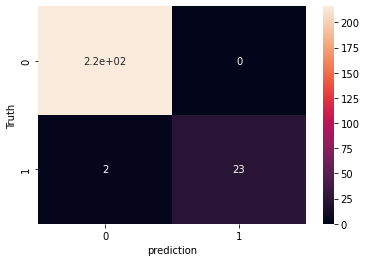

In [113]:
sns.heatmap(cm, annot=True)
plt.ylabel("Truth")
plt.xlabel("prediction")

In [114]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       216
           1       1.00      0.92      0.96        25

    accuracy                           0.99       241
   macro avg       1.00      0.96      0.98       241
weighted avg       0.99      0.99      0.99       241



KNN

In [115]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [116]:
y_pred = classifier.predict(X_test)

In [117]:
classifier.score(X_train,y_train)

0.925

In [118]:
classifier.score(X_test,y_test)

0.9045643153526971

In [119]:
from sklearn.metrics import confusion_matrix,classification_report

In [120]:
predictions=classifier.predict(X_test)

In [121]:
cm = confusion_matrix(y_test, predictions)

In [122]:
cm

array([[216,   0],
       [ 23,   2]], dtype=int64)

Text(0.5, 15.0, 'prediction')

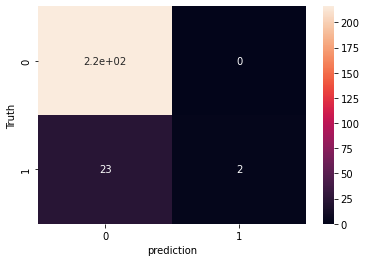

In [123]:
sns.heatmap(cm, annot=True)
plt.ylabel("Truth")
plt.xlabel("prediction")

In [124]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       216
           1       1.00      0.08      0.15        25

    accuracy                           0.90       241
   macro avg       0.95      0.54      0.55       241
weighted avg       0.91      0.90      0.87       241



SVM

In [125]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [126]:
y_pred = svclassifier.predict(X_test)

In [127]:
svclassifier.score(X_train,y_train)

1.0

In [128]:
svclassifier.score(X_test,y_test)

0.991701244813278

In [129]:
from sklearn.metrics import confusion_matrix,classification_report

In [130]:
predictions=classifier.predict(X_test)

In [131]:
cm = confusion_matrix(y_test, predictions)

In [132]:
cm

array([[216,   0],
       [ 23,   2]], dtype=int64)

Text(0.5, 15.0, 'prediction')

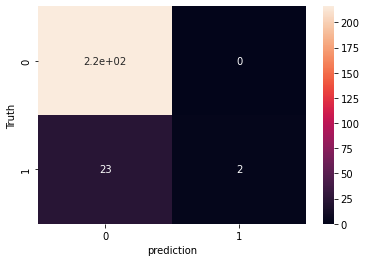

In [133]:
sns.heatmap(cm, annot=True)
plt.ylabel("Truth")
plt.xlabel("prediction")

In [134]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       216
           1       1.00      0.08      0.15        25

    accuracy                           0.90       241
   macro avg       0.95      0.54      0.55       241
weighted avg       0.91      0.90      0.87       241

